### 3-2 활성화 함수

임계값을 경계로 출력이 바뀌는 함수를 계단 함수 (step function)이라 하는데, 이는 단층 퍼셉트론에서 채용하는 함수이다. 
그 외에도 다른 활성화 함수를 알아보자.

#### 3.2.1 시그모이드 함수

h(x) = 1 / 1 + exp(-x)

exp(-x) 는 e^-x를 뜻하며, e는 자연상수로 2.7182...의 값을 갖는 실수이다.
입력을 주면 특정 값을 출력해주게 된다.
신경망에서는 시그모이드 함수로 신호를 변환하여 다음 뉴론으로 전달한다.

#### 3.2.2 계단 함수 구현하기

계단 함수는 입력이 0을 넘으면 1을, 그 외에는 0을 출력하는 함수이다.

In [7]:
import numpy as np

# 인수 x는 실수만 받아들일 수 있다.
def step_function(x):
    if x > 0: return 1
    else: return 0
    
    
# 배열도 입력으로 받을 수 있게 해보자
def step_function(x):
    y = x > 0 # x배열의 원소들에 대해 각각 0보다 큰지에 대한 bool 배열을 생성한다.
    return y.astype(np.int) # bool을 0또는 1의 int 값으로 할당해준다

넘파이 배열에 부등호 연산을 수행하면 배열 원소 각가에 연산을 수행해서 bool 배열을 return 한다.

In [8]:
x = np.array([-1.0, 1.0, 2.0])

y = x > 0
print(y)

[False  True  True]


넘파이 배열의 자료형을 변환할때는 astype() 메서드를 사용한다.
원하는 자료형을 인수로 입력한다.

In [9]:
y = y.astype(np.int)
print(y)

[0 1 1]


#### 3.2.3 계단 함수의 그래프

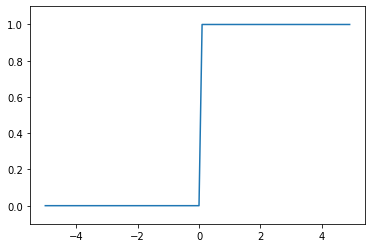

None


In [13]:
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1) # 해당 범위의 0.1 간격으로 넘파이 배열 생성
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
print(plt.show())

#### 3.2.4 시그모이드 함수 구현하기

넘파이의 브로드캐스트를 통해 x가 넘파이 배열로 들어와도 스칼라값의 연산을 배열의 원소 각각에 대하여 수행한다.

In [21]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [22]:
x = np.array([-1.0, 1.0, 2.0])
print(sigmoid(x))

[0.26894142 0.73105858 0.88079708]


In [23]:
# 브로드캐스트 예제

t = np.array([1.0, 2.0, 3.0])
print(1.0 + t)
print(1.0 * t)

[2. 3. 4.]
[1. 2. 3.]


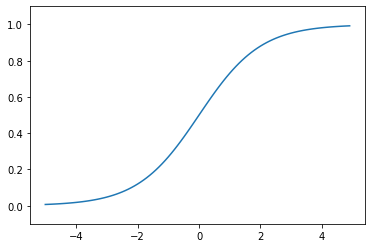

None


In [25]:
import matplotlib.pylab as plt
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
print(plt.show())

#### 3.2.5 시그모이드 함수와 계단 함수 비교

시그모이드는 입력에 따른 출력이 매끄럽다.
계단 함수는 뉴런 사이에 0 혹은 1이 흘렀다면 신경망에서는 연속적인 실수가 흐른다.

그러나 큰 괌점에서 보면 둘 다 입력이 작을 때의 출력은 0에 가깝고, 입력이 커지면 1에 가까워지는 구조이다.
입력이 중요하면 큰 값을, 중요하지 않다면 작은 값을 출력한다.
아무리 값이 작거나 커도 출력은 0과 1사이이다.

#### 3.2.6 비선형 함수

둘 모두는 비선형 함수이다. 함수는 어떤 값을 입력에 따른 값으로 돌려주는 변환기이다.
이런 변환기에 무언가 입력했을 때 출력이 입력의 상수배만큼 변하면 선형 함수라고 한다. 
f(x) = ax + b의 a와 b는 상수이다.그래서 선형 함수는 곧은 1개의 직선이 된다.

비선형 함수는 직선 1개로는 그릴 수 없는 함수를 말한다.

신경망에서는 선형 함수를 사용하면 안되는데, 이는 선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없기 때문이다.
선형 함수의 문제는 층을 아무리 깊이 해도 '은닉층이 없는 네트워크'로도 똑같은 기능을 할 수 있다는데 있다고 한다.

만약 3층짜리 네트워크가 있다고 가정을 해보자.
y = h(h(h(x))) 가 존재하면 이는 결국 y = c * c * c * x 처럼 곱을 세번 수행하나
y(x) = ax와 다를게 없다.

층을 쌓는 혜택을 얻고 싶다면 비선형 함수를 사용해야 한다.

#### 3.2.7 ReLU 함수

Rectified Linear Unit 함수를 주로 이용하기도 하는데
입력이 0을 넘으면 그대로 출력하고 0 이하이면 0을 출력하는 함수이다.

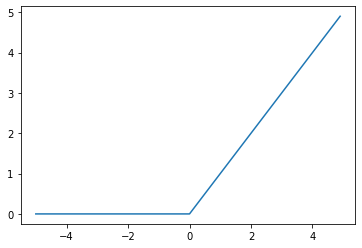

None


In [27]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
print(plt.show())